## DA_Fall21_HW_1 Due at Mid-night 10/19/2021

### This homework will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [2]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [3]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset ##

In [4]:
crash = pd.read_csv("car_crashes2.csv")
print(crash.shape)
crash.head()

(54, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [5]:
crash.describe()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,54.000000,53.000000,54.000000,54.000000,54.000000,53.000000,54.000000
mean,15.668519,5.028755,5.506778,13.545407,13.931500,908.318113,133.967407
std,4.087386,2.000479,5.157681,4.463259,3.730217,232.237787,24.703393
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.725000,3.774000,3.891000,10.345000,11.262000,768.950000,112.332500
50%,15.450000,4.608000,4.542000,13.816000,13.717000,861.180000,135.840000
75%,18.350000,6.510000,5.622000,16.215000,16.579000,1011.140000,152.065000
max,23.900000,9.450000,40.642000,23.661000,21.280000,2000.030000,194.780000


## Question 1. Check if there are any null or NA

In [6]:
crash.isnull().any()

accidents         False
speeding           True
alcohol           False
not_distracted    False
no_previous       False
ins_premium        True
ins_losses        False
state             False
region            False
division          False
dtype: bool

In [7]:
crash.speeding.unique()

array([7.332, 7.421, 6.51 , 4.032, 4.2  , 5.032, 4.968, 6.156, 2.006,
       3.759, 2.964, 9.45 , 5.508, 4.608, 3.625, 2.669, 4.806, 4.066,
       7.175, 5.738, 4.25 , 1.886, 3.384, 2.208, 2.64 , 6.923, 8.346,
       1.937, 5.439, 4.06 , 1.792, 3.496,   nan, 6.552, 5.497, 3.948,
       4.452, 6.368, 4.224, 9.1  , 7.1  , 3.774, 9.082, 6.014, 4.095,
       7.76 , 4.859, 4.08 , 2.413, 8.092, 7.308, 4.   ])

In [8]:
crash.ins_premium.unique()

array([ 784.55, 1053.48,  899.47,  827.34,  878.41,  835.5 , 1068.73,
       1137.87, 1273.89, 1160.13,  913.15,  861.18,  641.96,  803.11,
        710.46,  649.06,  780.45,  872.51, 1281.55,  661.88, 1048.78,
       1011.14, 1110.61,  777.18,  896.07,  790.32,  816.21,  732.28,
       1029.87,  746.54, 1301.52,  869.85, 1234.31,  708.24,  688.75,
        697.73, 2000.03,  881.51,  804.71,  905.99, 1148.99,  858.97,
        669.31,  767.91, 1004.75,  809.38,  716.2 ,  768.95,  890.03,
        992.61,  670.31,  791.14,     nan])

## Question 2. Remove any rows that has null or NA

In [9]:
cleaned_crash = crash[~np.isnan(crash.speeding)]
cleaned_crash = cleaned_crash[~np.isnan(cleaned_crash.ins_premium)]

In [10]:
cleaned_crash.isnull().any()

accidents         False
speeding          False
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 3. Check if there is any outliers in all numerical fields using both scatter and boxplot

<AxesSubplot:xlabel='accidents', ylabel='speeding'>

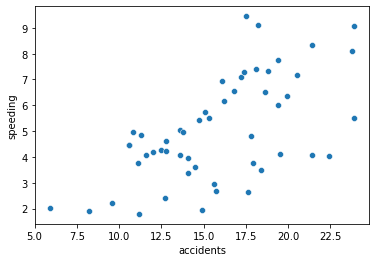

In [11]:
sns.scatterplot(x='accidents', y='speeding', data=cleaned_crash)

<AxesSubplot:xlabel='speeding', ylabel='alcohol'>

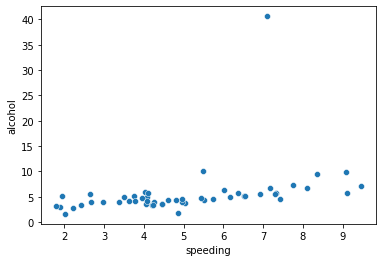

In [12]:
sns.scatterplot(x='speeding', y='alcohol', data=cleaned_crash)

<AxesSubplot:ylabel='accidents'>

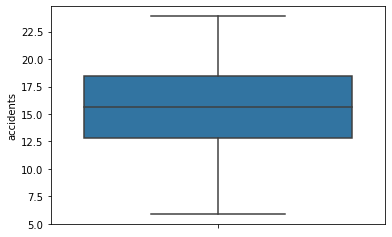

In [13]:
sns.boxplot(y=cleaned_crash["accidents"])

<AxesSubplot:ylabel='speeding'>

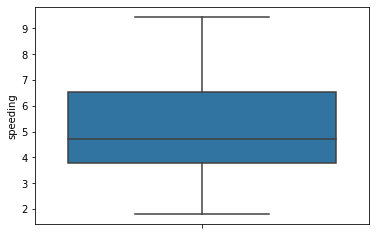

In [14]:
sns.boxplot(y=cleaned_crash["speeding"])

<AxesSubplot:ylabel='alcohol'>

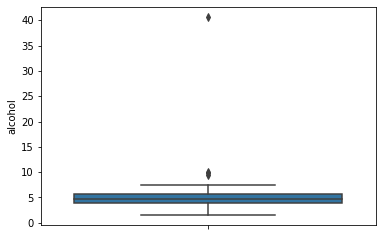

In [15]:
sns.boxplot(y=cleaned_crash["alcohol"])

<AxesSubplot:ylabel='not_distracted'>

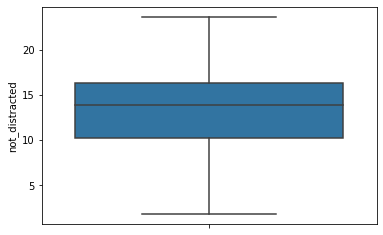

In [16]:
sns.boxplot(y=cleaned_crash["not_distracted"])

<AxesSubplot:ylabel='no_previous'>

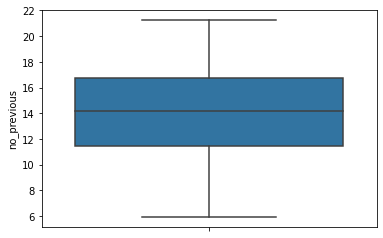

In [17]:
sns.boxplot(y=cleaned_crash["no_previous"])

<AxesSubplot:ylabel='ins_premium'>

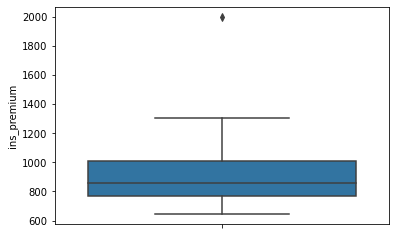

In [18]:
sns.boxplot(y=cleaned_crash["ins_premium"])

<AxesSubplot:ylabel='ins_losses'>

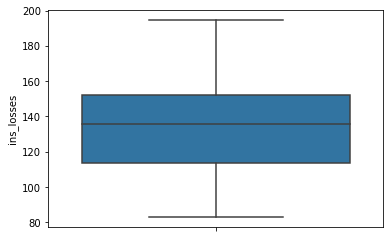

In [19]:
sns.boxplot(y=cleaned_crash["ins_losses"])

## Question 4. Display and Remove (the real) outliers

The first two graphs below are displaying the outliers (around 2000 on the y-axis in the first graph, and around 40 on the y-axis in the second graph). The subsequent two graphs are after the outliers are removed.

<AxesSubplot:xlabel='accidents', ylabel='ins_premium'>

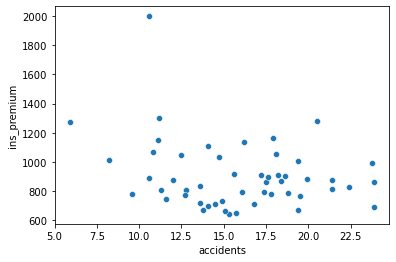

In [20]:
sns.scatterplot(x='accidents', y='ins_premium', data=cleaned_crash)

<AxesSubplot:xlabel='accidents', ylabel='alcohol'>

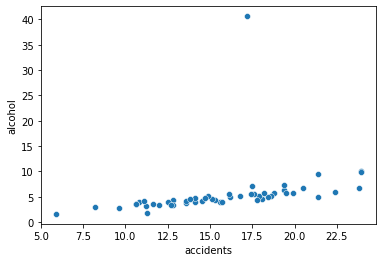

In [21]:
sns.scatterplot(x='accidents', y='alcohol', data=cleaned_crash)

In [22]:
no_outliers = cleaned_crash[cleaned_crash['alcohol'] <= 35]
no_outliers = no_outliers[no_outliers['ins_premium'] <= 1500]

<AxesSubplot:xlabel='accidents', ylabel='ins_premium'>

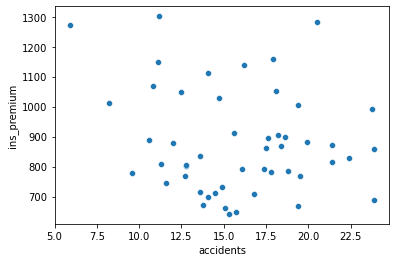

In [23]:
sns.scatterplot(x='accidents', y='ins_premium', data=no_outliers)

<AxesSubplot:xlabel='accidents', ylabel='alcohol'>

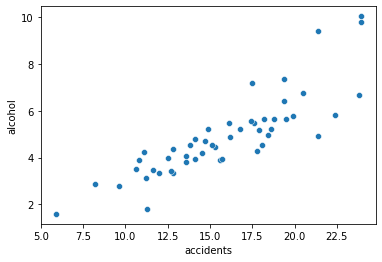

In [24]:
sns.scatterplot(x='accidents', y='alcohol', data=no_outliers)

## Question 5. Calculate the average speeding in usa and Northeast region using SQL

In [26]:
ps.sqldf("select avg(speeding) 'Average Speeding in USA' from no_outliers")

,Average Speeding in USA
0,5.01944


In [27]:
ps.sqldf("select region 'Region', avg(speeding) 'Average Speeding' from no_outliers where region = 'Northeast'")

,Region,Average Speeding
0,Northeast,4.42475


## Question 6. Calculate the average alcohol for each region using SQL

In [28]:
ps.sqldf("select region 'Region', avg(alcohol) 'Average Alcohol' from no_outliers group by region")

,Region,Average Alcohol
0,Midwest,4.996917
1,Northeast,3.980500
2,South,5.414647
3,West,4.754077


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

In [24]:
ps.sqldf("select division 'Division', count(*) 'Number of Occurrences', avg(speeding) 'Average Speeding', min(speeding) 'Minimum Speeding', max(speeding) 'Maximum Speeding' from no_outliers group by division")

,Division,Number of Occurrences,Average Speeding,Minimum Speeding,Maximum Speeding
0,East North Central,5,4.106600,3.384,4.968
1,East South Central,4,4.533250,2.640,7.332
2,Middle Atlantic,2,5.446000,1.792,9.100
3,Mountain,8,5.812250,3.496,8.346
4,New England,6,4.084333,1.886,5.738
5,Pacific,5,5.949400,4.200,9.450
6,South Atlantic,9,5.030444,2.006,9.082
7,West North Central,7,4.293429,1.937,6.923
8,West South Central,4,6.333750,4.032,7.760


## Question 8. Answer Question 7 but use Pandas functions

In [25]:
no_outliers.groupby(['division'])['division'].count()

division
East North Central    5
East South Central    4
Middle Atlantic       2
Mountain              8
New England           6
Pacific               5
South Atlantic        9
West North Central    7
West South Central    4
Name: division, dtype: int64

In [26]:
no_outliers.groupby(['division'])['speeding'].mean()

division
East North Central    4.106600
East South Central    4.533250
Middle Atlantic       5.446000
Mountain              5.812250
New England           4.084333
Pacific               5.949400
South Atlantic        5.030444
West North Central    4.293429
West South Central    6.333750
Name: speeding, dtype: float64

In [27]:
no_outliers.groupby(['division'])['speeding'].min()

division
East North Central    3.384
East South Central    2.640
Middle Atlantic       1.792
Mountain              3.496
New England           1.886
Pacific               4.200
South Atlantic        2.006
West North Central    1.937
West South Central    4.032
Name: speeding, dtype: float64

In [28]:
no_outliers.groupby(['division'])['speeding'].max()

division
East North Central    4.968
East South Central    7.332
Middle Atlantic       9.100
Mountain              8.346
New England           5.738
Pacific               9.450
South Atlantic        9.082
West North Central    6.923
West South Central    7.760
Name: speeding, dtype: float64

NOTE: This question can be solved by also calling the describe() method (as seen below), but this also includes extra information. I have included both answers since I'm not sure if you want all this other info.

In [29]:
no_outliers.groupby(['division'])['speeding'].describe()

,count,mean,std,min,25%,50%,75%,max
division,,,,,,,,
East North Central,5.0,4.106600,0.665705,3.384,3.62500,3.9480,4.60800,4.968
East South Central,4.0,4.533250,1.985597,2.640,3.70950,4.0805,4.90425,7.332
Middle Atlantic,2.0,5.446000,5.167536,1.792,3.61900,5.4460,7.27300,9.100
Mountain,8.0,5.812250,1.524017,3.496,4.98875,5.4735,6.70950,8.346
New England,6.0,4.084333,1.299621,1.886,3.84550,4.0700,4.74600,5.738
Pacific,5.0,5.949400,2.382195,4.200,4.22400,4.4520,7.42100,9.450
South Atlantic,9.0,5.030444,2.546183,2.006,2.96400,4.2500,6.55200,9.082
West North Central,7.0,4.293429,2.005279,1.937,2.43850,4.8060,5.75550,6.923
West South Central,4.0,6.333750,1.637184,4.032,5.78400,6.7715,7.32125,7.760


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region

In [30]:
no_outliers.groupby("region")['accidents'].std()

region
Midwest      3.588988
Northeast    3.077453
South        4.537037
West         3.325118
Name: accidents, dtype: float64

In [31]:
no_outliers.groupby("region")['accidents'].skew()

region
Midwest      0.950845
Northeast    0.777587
South       -1.125839
West         0.064819
Name: accidents, dtype: float64

In [32]:
no_outliers.groupby("region")['accidents'].apply(pd.DataFrame.kurtosis)

region
Midwest      2.067092
Northeast    0.726713
South        1.860064
West        -1.048692
Name: accidents, dtype: float64

In [33]:
no_outliers.groupby("region")['speeding'].std()

region
Midwest      1.537451
Northeast    2.327773
South        2.220711
West         1.803138
Name: speeding, dtype: float64

In [34]:
no_outliers.groupby("region")['speeding'].skew()

region
Midwest      0.121197
Northeast    1.051666
South        0.172035
West         0.697441
Name: speeding, dtype: float64

In [35]:
no_outliers.groupby("region")['speeding'].apply(pd.DataFrame.kurtosis)

region
Midwest     -0.737061
Northeast    1.763520
South       -1.327699
West        -0.465455
Name: speeding, dtype: float64

In [36]:
no_outliers.groupby("region")['alcohol'].std()

region
Midwest      1.824432
Northeast    0.872950
South        1.773576
West         1.910356
Name: alcohol, dtype: float64

In [37]:
no_outliers.groupby("region")['alcohol'].skew()

region
Midwest      2.093467
Northeast    0.764250
South        0.330988
West         1.159752
Name: alcohol, dtype: float64

In [38]:
no_outliers.groupby("region")['alcohol'].apply(pd.DataFrame.kurtosis)

region
Midwest      5.597372
Northeast    0.890501
South        2.125568
West         2.219220
Name: alcohol, dtype: float64

## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

array([[<AxesSubplot:title={'center':'Midwest'}>,
        <AxesSubplot:title={'center':'Northeast'}>],
       [<AxesSubplot:title={'center':'South'}>,
        <AxesSubplot:title={'center':'West'}>]], dtype=object)

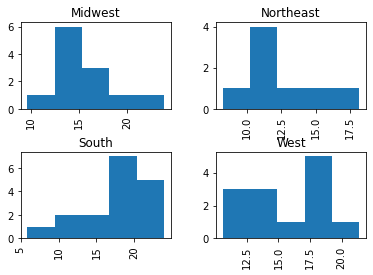

In [39]:
no_outliers['accidents'].hist(by=no_outliers['region'], bins=5)

## Question 11. How would you describe the accidents distribution for different region based on the Skew and Kurotsis?
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

In [45]:
no_outliers.groupby("region")['accidents'].skew()

region
Midwest      0.950845
Northeast    0.777587
South       -1.125839
West         0.064819
Name: accidents, dtype: float64

In terms of Skew, the Midwest, Northeast, and West regions all have a positive skew. This can be seen on the histograms, since each of these regions have the majority of their data points on the lower end of the scale. The Midwest has the highest positive skew, meaning that when compared to the other regions, there are more data points below the mean. The South region, however, has a negative skew, which is reflected in the histogram since the majority of the data points are on the higher end of the chart. Essentially, states in the South tend to have a higher frequency of average accidents when compared to states in other regions.

In [46]:
no_outliers.groupby("region")['accidents'].apply(pd.DataFrame.kurtosis)

region
Midwest      2.067092
Northeast    0.726713
South        1.860064
West        -1.048692
Name: accidents, dtype: float64

In terms of Kurtosis, the Midwest, Northeast, and South regions have a positive kurtosis (a positive kurtosis is one that is above 0 since Pandas uses 0 for the normal distribution instead of 3), meaning that they have more outliers than the standard distribution. The West, on the other hand, has a negative kurtosis, meaning that it has less outliers than the standard distribution. Essentially, the West has the most consistency when it comes to average accident rate in each state.

## Question 12. Calculate correlation of all the factors among themselves and determine which factors among speeding, alcohol or ins_premium will affect accidents the most?

In [40]:
no_outliers.corr()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
accidents,1.000000,0.608632,0.850706,0.826209,0.956009,-0.174157,-0.025507
speeding,0.608632,1.000000,0.667377,0.585337,0.568831,-0.059254,-0.059624
alcohol,0.850706,0.667377,1.000000,0.730435,0.780696,-0.146921,-0.103849
not_distracted,0.826209,0.585337,0.730435,1.000000,0.745712,-0.157416,-0.068733
no_previous,0.956009,0.568831,0.780696,0.745712,1.000000,-0.119067,0.007872
ins_premium,-0.174157,-0.059254,-0.146921,-0.157416,-0.119067,1.000000,0.625381
ins_losses,-0.025507,-0.059624,-0.103849,-0.068733,0.007872,0.625381,1.000000


Out of speeding, alcohol, and ins_premium, alcohol is the most strongly correlated with accidents - having a positive correlation of 0.850706. Speeding is next, with a positive correlation of 0.608632. Lastly, ins_premium is the least correlated with accidents, having a negative correlation of -0.174157. This means that alcohol will affect being in an accident the most when compared to speeding and ins_premium.

### Now Load a different dataset (MPG dataset number 3)

In [41]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


# Question 13: Check to see if there are any missing values. Fix the missing values by inputing value from the mean.

### Type your code to fix the missing values by imputing value from the mean

In [42]:
mpg.isnull().any()

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [43]:
mpg['mpg'] = mpg['mpg'].fillna(mpg['mpg'].mean())
mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean())
mpg['weight'] = mpg['weight'].fillna(mpg['weight'].mean())

In [44]:
mpg.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool